In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [294]:
df=pd.read_csv('/content/Depression Professional Dataset.csv')

In [295]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [296]:
df.shape

(2054, 11)

In [297]:
df.drop(columns=['Age','Family History of Mental Illness'],inplace=True)

In [298]:
df.columns

Index(['Gender', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [299]:
df.Gender.value_counts()

,count
Gender,
Male,1066
Female,988


In [300]:
df.isnull().sum()

,0
Gender,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Work Hours,0
Financial Stress,0
Depression,0


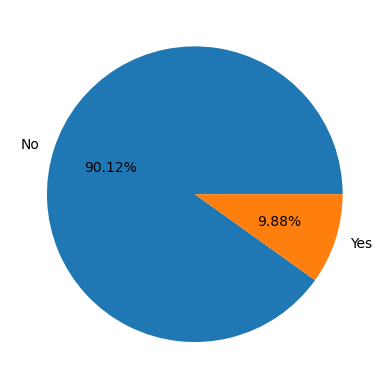

In [301]:
plt.pie(df['Depression'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.show()

In [302]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Sleep Duration']=le.fit_transform(df['Sleep Duration'])
df['Dietary Habits']=le.fit_transform(df['Dietary Habits'])
df['Have you ever had suicidal thoughts ?']=le.fit_transform(df['Have you ever had suicidal thoughts ?'])

In [303]:
X=df.drop(columns=['Depression'])
y=df['Depression']

In [304]:
y=le.fit_transform(y)

In [305]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [306]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [307]:
# prompt: perform smote in dependent var

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [319]:
pd.DataFrame(y_train_resampled).value_counts()

,count
0,
0,1476
1,1476


In [326]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga',penalty='l2')
classifier.fit(X_train_resampled,y_train_resampled)

LogisticRegression(solver='saga')

In [327]:
ypred=classifier.predict(X_test)

In [328]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8150851581508516

In [329]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       375
           1       0.30      0.83      0.44        36

    accuracy                           0.82       411
   macro avg       0.64      0.82      0.67       411
weighted avg       0.92      0.82      0.85       411

0.8150851581508516


After custom threshold

In [330]:
y_probs = classifier.predict_proba(X_test)[:, 1]

In [331]:
custom_threshold = 0.83  # Example threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))
print(accuracy_score(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       375
           1       0.50      0.44      0.47        36

    accuracy                           0.91       411
   macro avg       0.72      0.70      0.71       411
weighted avg       0.91      0.91      0.91       411

[[359  16]
 [ 20  16]]
0.9124087591240876


In [333]:
def predict_with_probability(user_input, custom_threshold=0.83):
    user_df = pd.DataFrame([user_input])

    # Preprocess user input (same as training data)
    user_df['Gender'] = le.transform(user_df['Gender'])
    user_df['Sleep Duration'] = le.transform(user_df['Sleep Duration'])
    user_df['Dietary Habits'] = le.transform(user_df['Dietary Habits'])
    user_df['Have you ever had suicidal thoughts ?'] = le.transform(user_df['Have you ever had suicidal thoughts ?'])

    # Scale user input using the same scaler as training data
    user_input_scaled = sc.transform(user_df)

    # Predict probability
    probability = classifier.predict_proba(user_input_scaled)[:, 1][0]

    # Predict class based on custom threshold
    prediction = 1 if probability >= custom_threshold else 0

    return prediction, probability

'''user_gender = input("Enter Gender (Male/Female): ")
user_sleep = input("Enter Sleep Duration (e.g. 4-6 hours, 7-9 hours): ")
user_diet = input("Enter Dietary Habits (Healthy/Unhealthy): ")
user_thoughts = input("Have you ever had suicidal thoughts? (Yes/No): ")

user_input = {
    'Gender': [user_gender],
    'Sleep Duration': [user_sleep],
    'Dietary Habits': [user_diet],
    'Have you ever had suicidal thoughts ?': [user_thoughts]
}

prediction, probability = predict_with_probability(user_input)

print(f"\nPrediction: {prediction}")  # 0 for No Depression, 1 for Depression
print(f"Probability of Depression: {probability:.4f}")'''

'user_gender = input("Enter Gender (Male/Female): ")\nuser_sleep = input("Enter Sleep Duration (e.g. 4-6 hours, 7-9 hours): ")\nuser_diet = input("Enter Dietary Habits (Healthy/Unhealthy): ")\nuser_thoughts = input("Have you ever had suicidal thoughts? (Yes/No): ")\n\nuser_input = {\n    \'Gender\': [user_gender],\n    \'Sleep Duration\': [user_sleep],\n    \'Dietary Habits\': [user_diet],\n    \'Have you ever had suicidal thoughts ?\': [user_thoughts]\n}\n\nprediction, probability = predict_with_probability(user_input)\n\nprint(f"\nPrediction: {prediction}")  # 0 for No Depression, 1 for Depression\nprint(f"Probability of Depression: {probability:.4f}")'

In [335]:
import joblib
joblib.dump(classifier, 'model2.joblib')

['model2.joblib']